習題 1：有一組資料來自義大利某個地區三個紅酒製造商所產的紅酒，資料內容包括的 178 支紅酒的 13 種化學成分。

    繪製相關係數圖
- 變數包含十三項變數，由熱點圖的顏色呈現變數之間的相關性，顏色越深代表相關性越高。
- 變數之間的相關性以『Flavanoids』與『Total_Phenols』最高（0.86），『OD280』與『Ash』最低（0.0039）。
- 變數『Total_Phenols』與變數『Flavanoids』顏色較其他變數深，也就是説變數間相關性高。
- 變數『Ash』顏色較其他變數淺，也就是説變數間相關性低。

<AxesSubplot:>

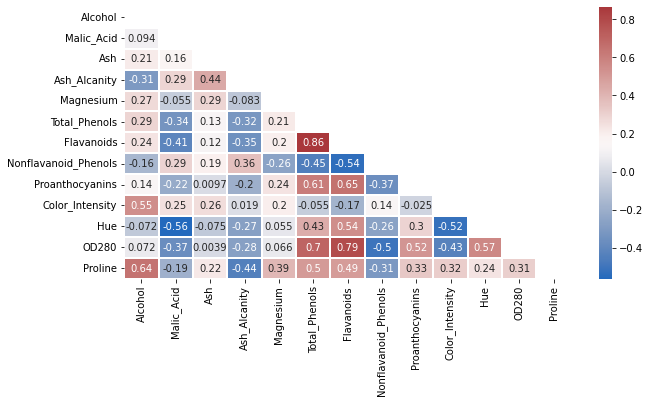

In [23]:
from sklearn.preprocessing import StandardScaler
import seaborn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
D = pd.read_excel('wine.xlsx')
y = D["Customer_Segment"]
categories = D.columns[0:13]
ratings = np.array(D.loc[:,categories])
scaler = StandardScaler()
scaler.fit(ratings)
ratings_ = scaler.transform(ratings)
df = pd.DataFrame(ratings_, columns = categories)
R = df.corr()
mask = np.triu(np.ones_like(R, dtype=bool)) 
plt.figure(figsize = (10,5))
seaborn.heatmap(R, annot=True, mask = mask, cmap = 'vlag', linewidths = 0.1)

    繪製盒鬚圖

- 由原盒鬚圖可以看出變數『Proline』的特徵明顯較其他變數高。
- 透過將數據標準化，可以解決盒鬚圖被壓縮的問題。

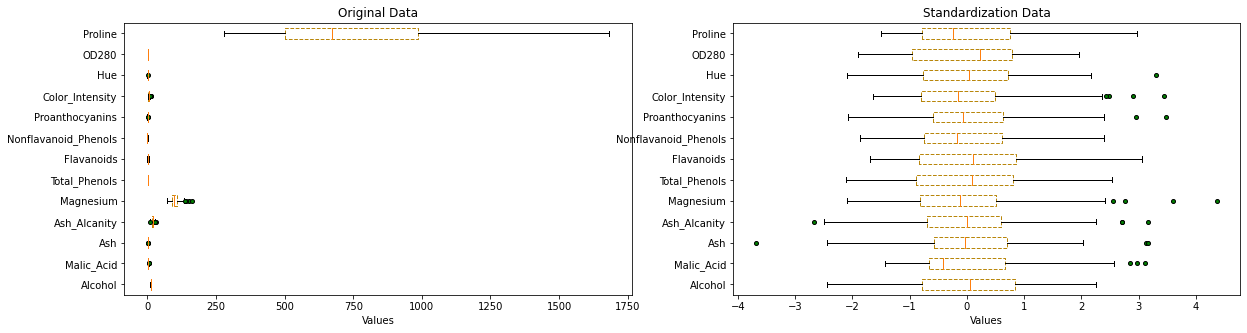

In [24]:
import matplotlib.pyplot as plt
"""
ratings 標準化前
ratings_ 標準化後
"""
fig,ax = plt.subplots(1,2,figsize = (20,5))
boxprops = dict(linestyle = '--', linewidth = 1,color = 'darkgoldenrod')
flierprops = dict(marker='o', markerfacecolor = 'green',markersize = 4, linestyle = 'none')
ax[0].boxplot(ratings, boxprops = boxprops, flierprops = flierprops, labels = categories, vert = False)
ax[1].boxplot(ratings_, boxprops = boxprops, flierprops = flierprops, labels = categories, vert = False)
ax[0].set_title('Original Data')
ax[0].set_xlabel('Values')
ax[1].set_title('Standardization Data')
ax[1].set_xlabel('Values')
plt.show()

    進行主成分分析繪製特徵值由大而小的分佈與陡坡圖(scree plot)

- 左圖為特徵值經過遞減排序後的陡坡圖
    - 第一個主成分的貢獻率遠高於第二個貢獻率
    - 第四個主成分後貢獻率非常的小
- 右圖長條圖為特徵值紅色陡坡線段為累積特徵值
    - 取得兩個成分的貢獻率超過50%
    - 取得三個成分的貢獻率超過60%

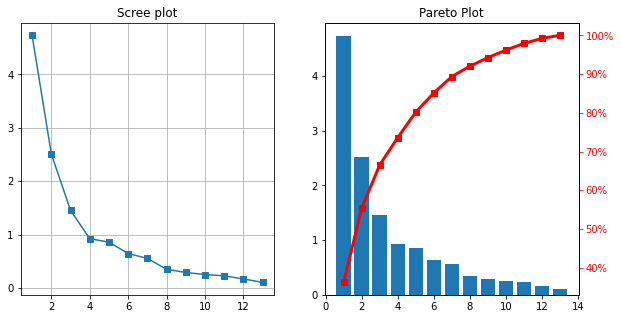

In [3]:
from matplotlib.ticker import PercentFormatter
from numpy.linalg import eig
Sx = np.cov(ratings_.T, bias=False)
w, v = eig(Sx) 
idx = np.argsort(w)[::-1]  
eigvals = w[idx]
eigvecs = v[:, idx]
x = np.arange(1, 1+len(eigvals))

fig,ax = plt.subplots(1,2,figsize = (10,5))
ax[0].plot(x, eigvals, marker='s')
ax[0].set_title('Scree plot')
ax[0].grid(True)
ax2 = ax[1].twinx()
ax[1].bar(x, eigvals)
ax2.plot(x, eigvals.cumsum()/eigvals.sum()*100,  marker='s', color='red', lw=3)
ax2.tick_params(axis='y', colors='red')
ax2.yaxis.set_major_formatter(PercentFormatter())
ax[1].set_title('Pareto Plot')
plt.show()

    利用主成分分析取得前兩項成分，並繪製其散佈圖
- 標準化前
    - 左圖為兩項成分（$Z_1$與$Z_2$）的散佈圖，右圖將三個類別分別加入不同的顏色
    - 辨別三個類別的分類結果普通，Class2與Class3明顯有部分重疊。

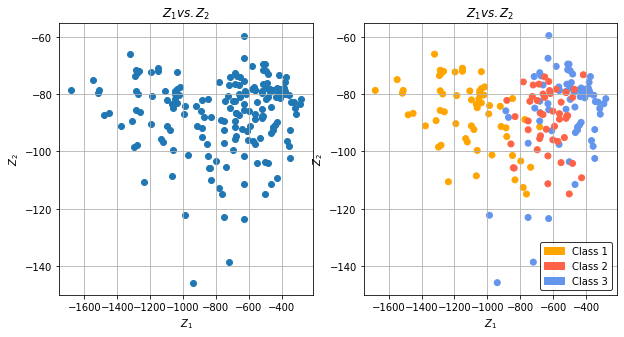

In [4]:
import matplotlib.patches as mpatches
Sx = np.cov(ratings.T, bias=False)
w, v = eig(Sx) 
idx = np.argsort(w)[::-1]  
eigvals = w[idx]
eigvecs = v[:, idx]
Z = eigvecs.T @ ratings.T
z1, z2 = Z[0,:], Z[1,:]
fig,ax = plt.subplots(1,2,figsize = (10,5))
ax[0].scatter(z1, z2)
# ax[0].set_aspect(1) 等比例呈現
ax[0].grid()
ax[0].set_xlabel('$Z_1$'),ax[0].set_ylabel('$Z_2$')
ax[0].set_title('$Z_1 vs. Z_2$')
colors = ['orange' if i == 1 else 'cornflowerblue' if i == 2 else 'tomato' for i in y]
ax[1].scatter(z1, z2, c=colors)
ax[1].grid()
ax[1].set_xlabel('$Z_1$'),ax[1].set_ylabel('$Z_2$')
ax[1].set_title('$Z_1 vs. Z_2$')

a = mpatches.Patch(color='orange',label='Class 1')
b = mpatches.Patch(color='tomato',label='Class 2')
c = mpatches.Patch(color='cornflowerblue',label='Class 3')
plt.legend(handles=[a,b,c],edgecolor='black',loc='lower right')
plt.show()

- 標準化後
    - 左圖為兩項成分（$Z_1$與$Z_2$）的散佈圖，右圖將三個類別分別加入不同的顏色。
    - 選取兩個成分並且將數據標準化後，群組分辨能力明顯提升。

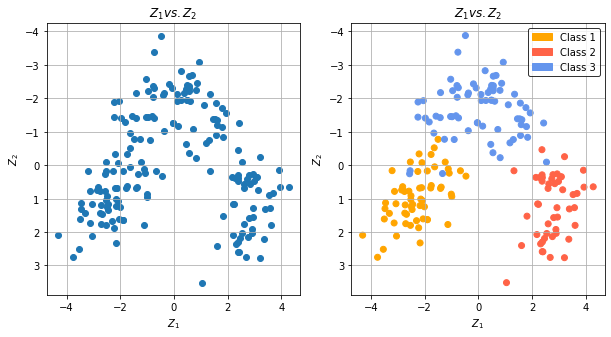

In [5]:
import matplotlib.patches as mpatches
"""
X 包含13個變數
y 是 Customer_Segment(1,2,3)
"""
Sx = np.cov(ratings_.T, bias=False)
w, v = eig(Sx) 
idx = np.argsort(w)[::-1]  
eigvals = w[idx]
eigvecs = v[:, idx]
Z = eigvecs.T @ ratings_.T
z1, z2 = Z[0,:], Z[1,:]
fig,ax = plt.subplots(1,2,figsize = (10,5))
ax[0].scatter(z1, z2)
# ax[0].set_aspect(1)
ax[0].grid()
ax[0].set_xlabel('$Z_1$'),ax[0].set_ylabel('$Z_2$')
ax[0].set_title('$Z_1 vs. Z_2$')
ax[0].invert_yaxis()
colors = ['orange' if i == 1 else 'cornflowerblue' if i == 2 else 'tomato' for i in y]
ax[1].scatter(Z[0,:],Z[1,:],c=colors)
# ax[1].set_aspect(1)
ax[1].grid()
ax[1].set_xlabel('$Z_1$'),ax[1].set_ylabel('$Z_2$')
ax[1].set_title('$Z_1 vs. Z_2$')
ax[1].invert_yaxis()

a = mpatches.Patch(color='orange',label='Class 1')
b = mpatches.Patch(color='tomato',label='Class 2')
c = mpatches.Patch(color='cornflowerblue',label='Class 3')
plt.legend(handles=[a,b,c],edgecolor='black',loc='upper right')
plt.show()


    利用主成分分析取得前三項成分，並繪製其立體圖
- 在三度空間的立體圖中，可以透過指令view_init()改變圖的角度。
- 我認為兩項成分和三項成分的群組分辨能皆很好。

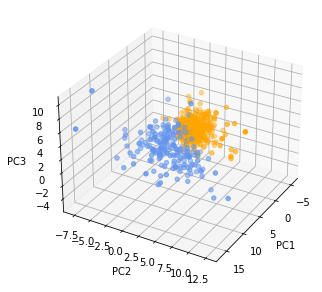

In [19]:
from sklearn.decomposition import PCA

Z_T = Z.T
pca = PCA(n_components=3)
X_pca = pca.fit_transform(Z_T)

# 繪製立體圖
fig = plt.figure(figsize = (5,5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:,0], X_pca[:,1], X_pca[:,2], c=colors)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.view_init(30,30)
plt.show()

    觀察第一組成分與第二組成分的組成係數
- 第一主成分$Z_1$
    - 第7個變數『Flavanoids』的係數最大(-0.4229)
    - 第3個變數『Ash』的係數最小(0.002)
- 第二主成分$Z_2$
    - 第10個變數『Color Intensity』的係數最大(-0.53)
    - 第7個變數『Flavanoids』的係數最小(-0.0034)
- 與原變數間的相關係數圖對照，透露了相同的訊息。
    - 第一題中『Flavanoids』與變數間相關性高『Ash』與變數間相關性低
    - 新變數為舊變數的線性組合


In [7]:
print("The Z1's eigenvectors is %s" % eigvecs[:,0])
print("The Z2's eigenvectors is %s" % eigvecs[:,1])

The Z1's eigenvectors is [-0.1443294   0.24518758  0.00205106  0.23932041 -0.14199204 -0.39466085
 -0.4229343   0.2985331  -0.31342949  0.0886167  -0.29671456 -0.37616741
 -0.28675223]
The Z2's eigenvectors is [ 0.48365155  0.22493093  0.31606881 -0.0105905   0.299634    0.06503951
 -0.00335981  0.02877949  0.03930172  0.52999567 -0.27923515 -0.16449619
  0.36490283]


習題 2  :  資料來自 sklearn.datasets 的一組關於乳癌患者腫瘤的影像量測資料。

    繪製相關係數圖
- 圖為列出相關係數高於0.7的部分
- 變數之間的相關性以『mean perimeter』與『mean radius』最高（1）。

<AxesSubplot:>

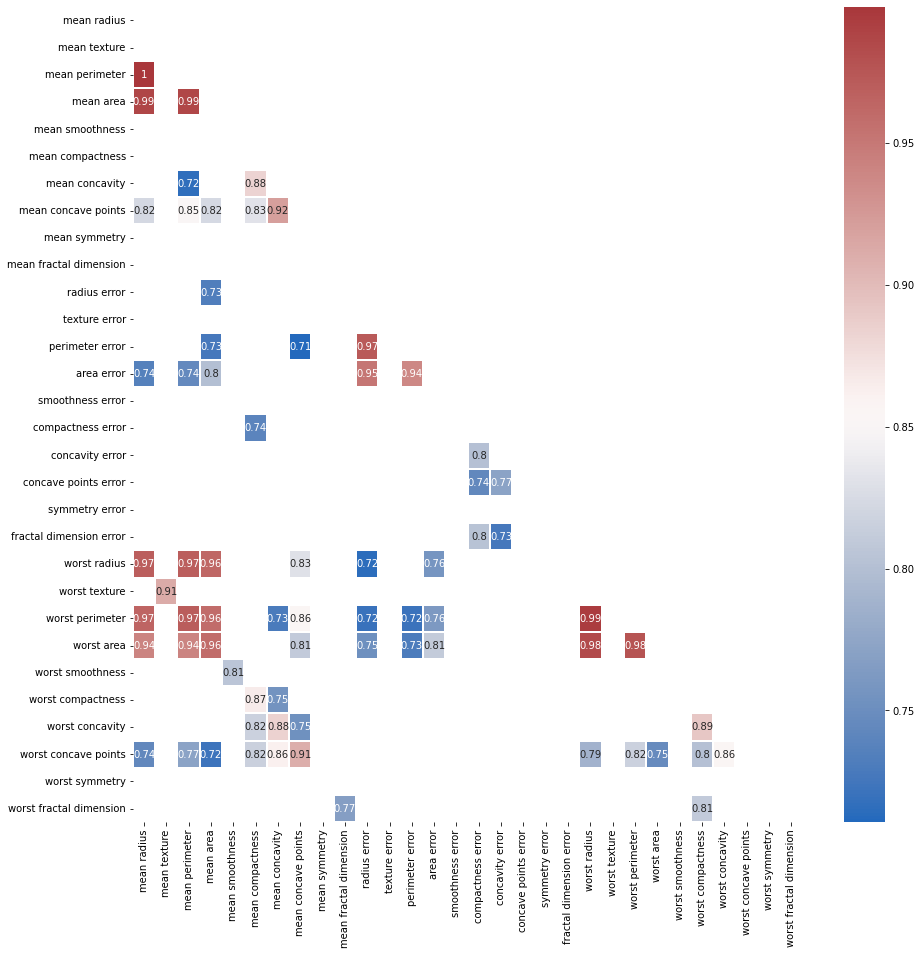

In [8]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
D = data['data']
y = data['target']
categories = data['feature_names']
df = pd.DataFrame(D, columns = categories)
ratings = np.array(df.loc[:,categories])
scaler = StandardScaler()
scaler.fit(ratings)
ratings_ = scaler.transform(ratings)
df = pd.DataFrame(ratings_, columns = categories)
R = df.corr()
big = R[abs(R)>0.7]
mask = np.triu(np.ones_like(R, dtype=bool)) 
plt.figure(figsize = (15,15))
seaborn.heatmap(big, annot=True, mask = mask, cmap = 'vlag', linewidths = 0.1)

- 下圖為列出相關係數小於0.1的部分
- 變數之間的相關性以『worst perimeter』與『fractal dimension error』最低（-0.001）。

<AxesSubplot:>

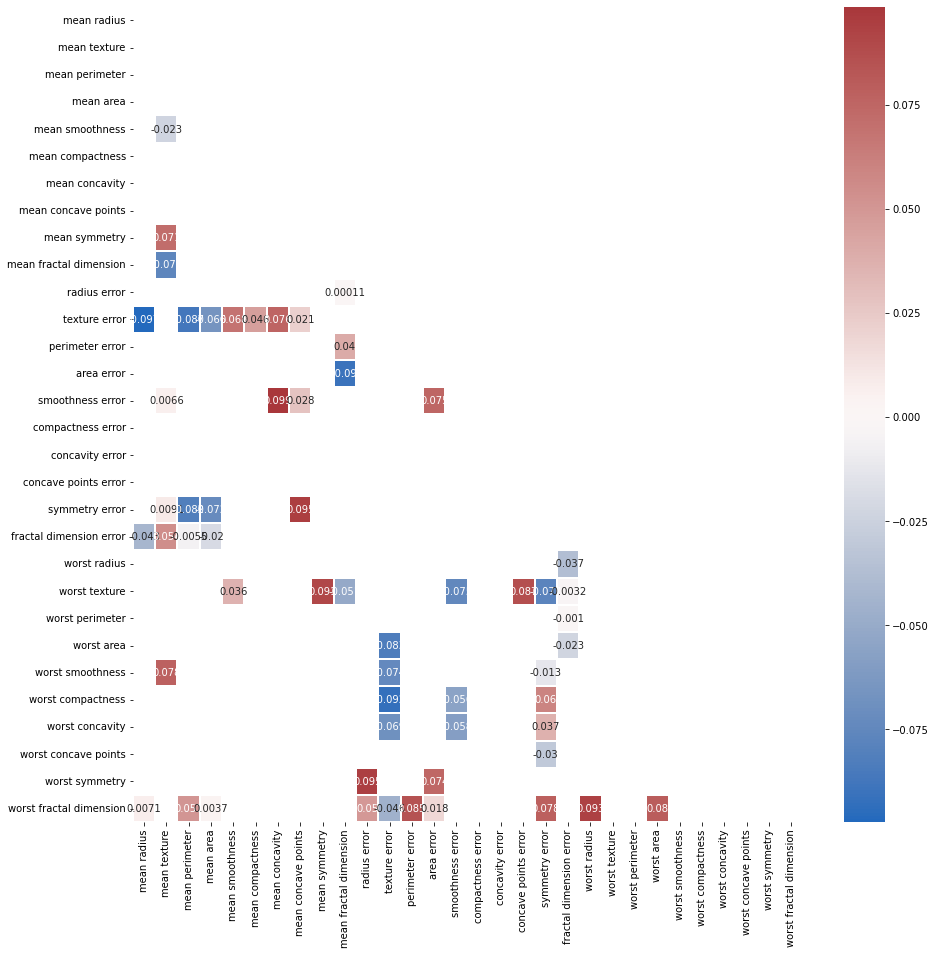

In [9]:
big = R[abs(R)<0.1]
mask = np.triu(np.ones_like(R, dtype=bool)) 
plt.figure(figsize = (15,15))
seaborn.heatmap(big, annot=True, mask = mask, cmap = 'vlag', linewidths = 0.1)

    繪製盒鬚圖

- 由原盒鬚圖可以看出變數『worst area』與『mean area』的特徵明顯較其他變數高。
- 透過將數據標準化，可以解決盒鬚圖被壓縮的問題。

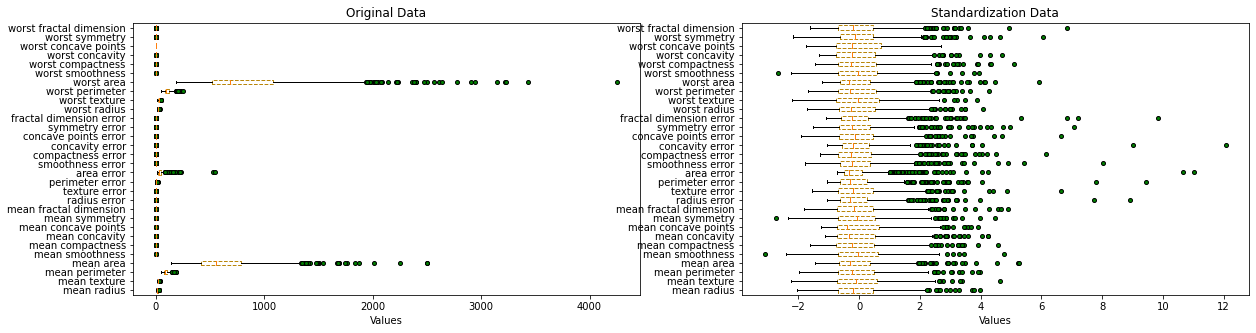

In [21]:
import matplotlib.pyplot as plt

"""
ratings 標準化前
ratings_ 標準化後
"""
fig,ax = plt.subplots(1,2,figsize = (20,5))
boxprops = dict(linestyle = '--', linewidth = 1,color = 'darkgoldenrod')
flierprops = dict(marker='o', markerfacecolor = 'green',markersize = 4, linestyle = 'none')
ax[0].boxplot(ratings, boxprops = boxprops, flierprops = flierprops, labels = categories, vert = False)
ax[1].boxplot(ratings_, boxprops = boxprops, flierprops = flierprops, labels = categories, vert = False)
ax[0].set_title('Original Data')
ax[0].set_xlabel('Values')
ax[1].set_title('Standardization Data')
ax[1].set_xlabel('Values')
plt.show()

    進行主成分分析繪製特徵值由大而小的分佈與陡坡圖(scree plot)

- 左圖為特徵值經過遞減排序後的陡坡圖
    - 第一個主成分的貢獻率遠高於第二個貢獻率
    - 第三個主成分後貢獻率非常的小
- 右圖長條圖為特徵值紅色陡坡線段為累積特徵值
    - 取得兩個成分的貢獻率超過60%
    - 取得三個成分的貢獻率超過70%

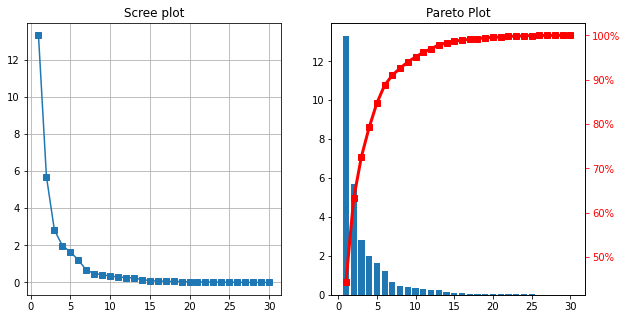

In [12]:
from matplotlib.ticker import PercentFormatter
from numpy.linalg import eig
Sx = np.cov(ratings.T, bias=False)
Sx_ = np.cov(ratings_.T, bias=False)
w, v = eig(Sx_) 
idx = np.argsort(w)[::-1]  
eigvals = w[idx]
eigvecs = v[:, idx]
x = np.arange(1, 1+len(eigvals))
Sigma_x = eigvecs @ np.diag(eigvals) @ eigvecs.T

fig,ax = plt.subplots(1,2,figsize = (10,5))
ax[0].plot(x, eigvals, marker='s')
ax[0].set_title('Scree plot')
ax[0].grid(True)
ax2 = ax[1].twinx()
ax[1].bar(x, eigvals)
ax2.plot(x, eigvals.cumsum()/eigvals.sum()*100,  marker='s', color='red', lw=3)
ax2.tick_params(axis='y', colors='red')
ax2.yaxis.set_major_formatter(PercentFormatter())
ax[1].set_title('Pareto Plot')
plt.show()

    利用主成分分析取得前兩項成分，並繪製其散佈圖
- 標準化前
    - 左圖為兩項成分（$Z_1$與$Z_2$）的散佈圖，右圖將兩個類別分別加入不同的顏色
    - 辨別兩個類別的分類結果普不錯

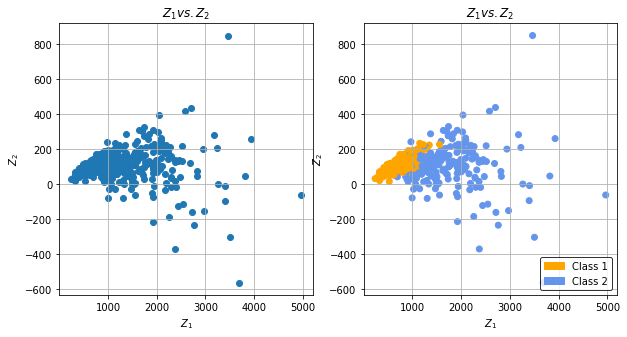

In [13]:
import matplotlib.patches as mpatches
"""
X 包含30個變數
y 是 Customer_Segment(0,1)
"""
w, v = eig(Sx) 
eigvecs = v[:, idx]
Z = eigvecs.T @ ratings.T
z1, z2 = Z[0,:], Z[1,:]
fig,ax = plt.subplots(1,2,figsize = (10,5))
ax[0].scatter(z1, z2)
ax[0].grid()
ax[0].set_xlabel('$Z_1$'),ax[0].set_ylabel('$Z_2$')
ax[0].set_title('$Z_1 vs. Z_2$')
colors = ['orange' if i == 1 else 'cornflowerblue' for i in y]
ax[1].scatter(Z[0,:],Z[1,:],c=colors)
ax[1].grid()
ax[1].set_xlabel('$Z_1$'),ax[1].set_ylabel('$Z_2$')
ax[1].set_title('$Z_1 vs. Z_2$')

a = mpatches.Patch(color='orange',label='Class 1')
b = mpatches.Patch(color='cornflowerblue',label='Class 2')
plt.legend(handles=[a,b],edgecolor='black',loc='lower right')
plt.show()


- 標準化後
    - 左圖為兩項成分（$Z_1$與$Z_2$）的散佈圖，右圖將三個類別分別加入不同的顏色。
    - 選取兩個成分並且將數據標準化後，群組分辨能力依然不錯。

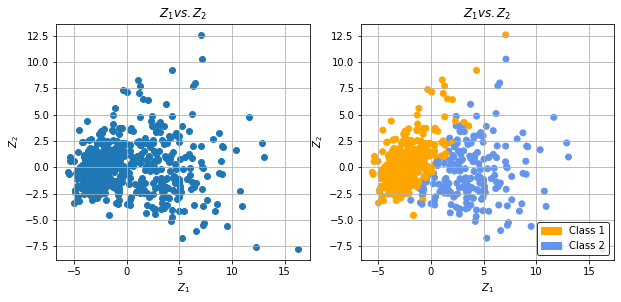

In [14]:
import matplotlib.patches as mpatches
"""
X 包含30個變數
y 是 Customer_Segment(0,1)
"""
w, v = eig(Sx_) 
eigvecs = v[:, idx]
Z = eigvecs.T @ ratings_.T
z1, z2 = Z[0,:], Z[1,:]
fig,ax = plt.subplots(1,2,figsize = (10,5))
ax[0].scatter(z1, z2)
ax[0].set_aspect(1)
ax[0].grid()
ax[0].set_xlabel('$Z_1$'),ax[0].set_ylabel('$Z_2$')
ax[0].set_title('$Z_1 vs. Z_2$')
colors = ['orange' if i == 1 else 'cornflowerblue' for i in y]
ax[1].scatter(Z[0,:],Z[1,:],c=colors)
ax[1].set_aspect(1)
ax[1].grid()
ax[1].set_xlabel('$Z_1$'),ax[1].set_ylabel('$Z_2$')
ax[1].set_title('$Z_1 vs. Z_2$')

a = mpatches.Patch(color='orange',label='Class 1')
b = mpatches.Patch(color='cornflowerblue',label='Class 2')
plt.legend(handles=[a,b],edgecolor='black',loc='lower right')
plt.show()


    利用主成分分析取得前三項成分，並繪製其立體圖
- 在三度空間的立體圖中，可以透過指令view_init()改變圖的角度。
- 我認為兩項成分和三項成分的群組分辨能皆很好。

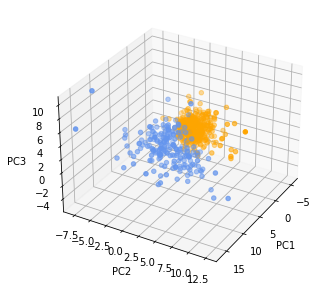

In [20]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
X_pca = pca.fit_transform(Z.T)

# 繪製立體圖
fig = plt.figure(figsize = (5,5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:,0], X_pca[:,1], X_pca[:,2], c=colors)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.view_init(30,30)
plt.show()

    觀察第一組成分與第二組成分的組成係數
- 第一主成分$Z_1$
    - 第7個變數『mean concavity』的係數最大(0.2609)
    - 第14個變數『area error』的係數最小(0.0145)
- 第二主成分$Z_2$
    - 第9個變數『mean fractal dimension』的係數最大(0.3666)
    - 第27個變數『worst concave points』的係數最小(-0.0083)
- 與原變數間的相關係數圖對照，透露了相同的訊息。
    - 『Flavanoids』與變數間相關性高
    - 『Ash』與變數間相關性低


In [16]:
z1,z2 = eigvecs[:,0].tolist(),eigvecs[:,1].tolist()
z1_a,z2_a = abs(eigvecs[:,0]).tolist(),abs(eigvecs[:,1]).tolist()
z1_max,z1_min = max(z1_a),min(z1_a)
z2_max,z2_min = max(z2_a),min(z2_a)
z1_max_n,z1_min_n = z1_a.index(z1_max),z1_a.index(z1_min)
z2_max_n,z2_min_n = z2_a.index(z2_max),z2_a.index(z2_min)
print("The maximum and minimum of Z1's eigenvectors are %s'%s' and %s'%s' = %.4f and %.4f" % (z1_max_n,categories[z1_max_n],z1_min_n,categories[z1_min_n],z1[z1_max_n],z1[z1_min_n]))
print("The maximum and minimum of Z2's eigenvectors are %s'%s' and %s'%s' = %.4f and %.4f" % (z2_max_n,categories[z2_max_n],z2_min_n,categories[z2_min_n],z2[z2_max_n],z2[z2_min_n]))

The maximum and minimum of Z1's eigenvectors are 7'mean concave points' and 14'smoothness error' = 0.2609 and 0.0145
The maximum and minimum of Z2's eigenvectors are 9'mean fractal dimension' and 27'worst concave points' = 0.3666 and -0.0083
